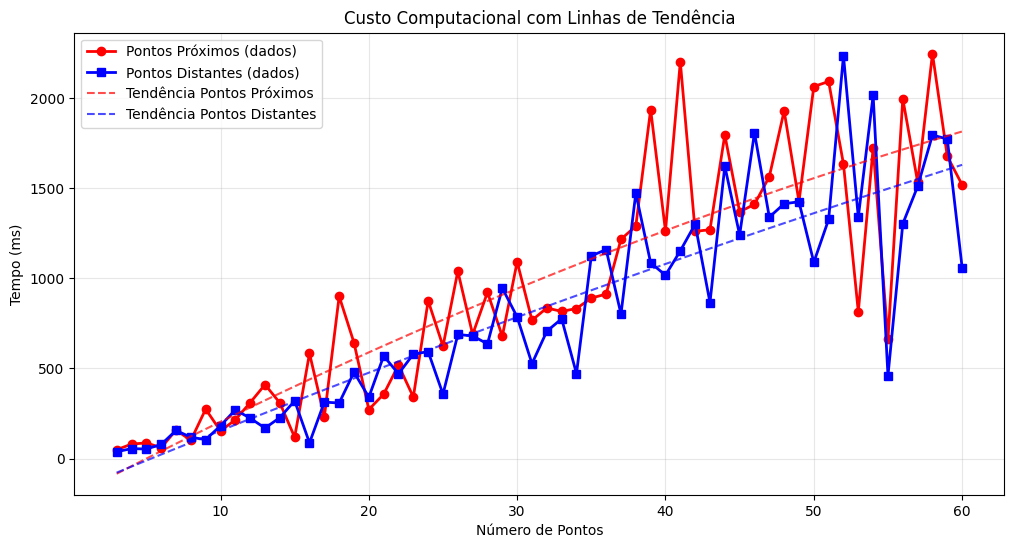

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('pontos_proximos.csv')
df2 = pd.read_csv('pontos_distantes.csv')
plt.figure(figsize=(12, 6))

plt.plot(df1['NumberOfPoints'], df1['ExecutionTimeMicroseconds'], 'ro-',
         label='Pontos Próximos (dados)', linewidth=2, markersize=6)
plt.plot(df2['NumberOfPoints'], df2['ExecutionTimeMicroseconds'], 'bs-',
         label='Pontos Distantes (dados)', linewidth=2, markersize=6)

z1 = np.polyfit(df1['NumberOfPoints'], df1['ExecutionTimeMicroseconds'], 2)
p1 = np.poly1d(z1)
z2 = np.polyfit(df2['NumberOfPoints'], df2['ExecutionTimeMicroseconds'], 2)
p2 = np.poly1d(z2)

x_smooth = np.linspace(3, 60, 100)
plt.plot(x_smooth, p1(x_smooth), 'r--', alpha=0.7,
         label='Tendência Pontos Próximos')
plt.plot(x_smooth, p2(x_smooth), 'b--', alpha=0.7,
         label='Tendência Pontos Distantes')

plt.xlabel('Número de Pontos')
plt.ylabel('Tempo (ms)')
plt.title('Custo Computacional com Linhas de Tendência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

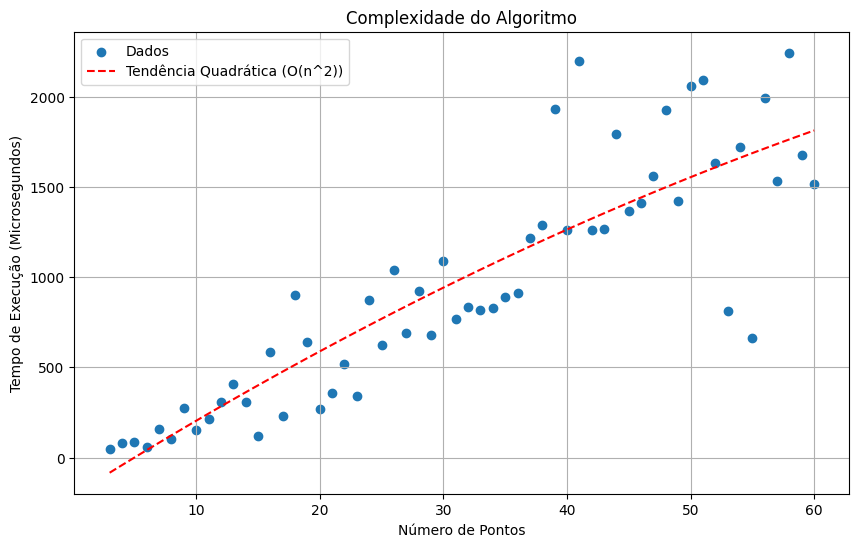

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Using 'pontos_proximos.csv' for the complexity analysis plot
    df_performance = pd.read_csv('pontos_proximos.csv')

    plt.figure(figsize=(10, 6))
    plt.scatter(df_performance['NumberOfPoints'], df_performance['ExecutionTimeMicroseconds'], label='Dados')

    # Fit a polynomial trendline (degree 2 for O(n^2) complexity)
    z = np.polyfit(df_performance['NumberOfPoints'], df_performance['ExecutionTimeMicroseconds'], 2)
    p = np.poly1d(z)
    x_smooth = np.linspace(df_performance['NumberOfPoints'].min(), df_performance['NumberOfPoints'].max(), 100)
    plt.plot(x_smooth, p(x_smooth), color='red', linestyle='--', label='Tendência Quadrática (O(n^2))')

    plt.xlabel('Número de Pontos')
    plt.ylabel('Tempo de Execução (Microsegundos)')
    plt.title('Complexidade do Algoritmo')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Erro: O arquivo não foi encontrado. Por favor, verifique o nome e o caminho do arquivo.")
except KeyError as e:
    print(f"Erro: A coluna {e} não foi encontrada no arquivo CSV.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")